<a href="https://colab.research.google.com/github/sunyeul/ToyProjectLab/blob/feature%2Fpytorch-oop-sample/PyTorch_OOP/03_torchvision_MNIST_mini_batch_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import torch
from torch import nn, optim
from torch.utils.data import DataLoader, random_split

from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize

from tqdm import tqdm

import matplotlib.pyplot as plt

In [ ]:
class cfg:
    train_batch_size = 64
    val_batch_size = 64
    num_epochs = 10

In [ ]:
model = nn.Sequential(
    nn.Linear(28*28, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10),
)

model.train() # 明示的に学習モードにしている（デフォルトでtraining=Trueなので本当は不要）
lossfun = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
transform = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

mnist_train_dataset = MNIST(
    root=os.getcwd(),
    train=True,
    download=True,
    transform=transform
)

mnist_train_dataset, mnist_val_dataset = random_split(
    dataset=mnist_train_dataset,
    lengths=[55_000, 5_000]
)

mnist_train_dataloader = DataLoader(
    dataset=mnist_train_dataset,
    batch_size=cfg.train_batch_size,
    shuffle=False
    )


mnist_val_dataloader = DataLoader(
    dataset=mnist_val_dataset,
    batch_size=cfg.val_batch_size,
    shuffle=False
    )

In [ ]:
avg_val_losses = []

for ep in tqdm(range(cfg.num_epochs)):

    for train_batch in mnist_train_dataloader:
        x, y = train_batch
        x = x.view(x.size(0), -1)
        
        out = model(x)
        
        train_loss = lossfun(out, y)
        train_loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()

    with torch.no_grad():
        epoch_avg_val_loss = 0
        for val_batch in mnist_val_dataloader:
            x, y= val_batch
            x = x.view(x.size(0), -1)

            out = model(x)

            val_loss = lossfun(out, y)
            epoch_avg_val_loss += val_loss.item() / x.size(0)
    avg_val_losses.append(epoch_avg_val_loss)

100%|██████████| 10/10 [01:40<00:00, 10.08s/it]


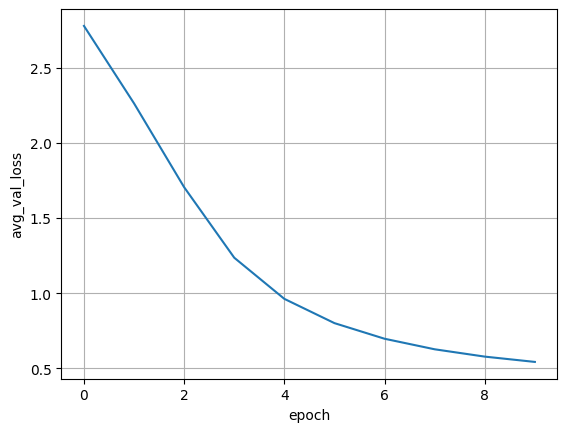

In [ ]:
plt.plot(avg_val_losses)
plt.xlabel('epoch')
plt.ylabel('avg_val_loss')
plt.grid(True)
plt.show()